##  Simulating Dice Rolls: A Path to the Normal Distribution

In this experiment, we simulate 2000 rounds where each participant rolls **four fair 6-sided dice**. The sum of the four dice is recorded and analyzed. This helps us explore how repeated random events behave and how they relate to the **normal distribution**.

---

###  Uniform Distribution of a Single Die Roll

A single fair 6-sided die has equal chances of landing on any number from 1 to 6. This means it follows a **uniform distribution** — every value has the same probability (1 in 6).

But when we sum multiple such dice rolls, the shape of the distribution changes.

---

###  Central Limit Theorem (CLT)

The **Central Limit Theorem** (CLT) tells us that if we take a large number of independent and identically distributed random variables and sum them, the resulting distribution tends to look like a **normal (bell-shaped) curve** — even if the original variables are not normally distributed.

In our case:
- Each die is uniformly distributed.
- But the **sum of four dice**, repeated over 2000 samples, shows a clear bell shape.
- This is because the combined outcome of multiple independent random variables starts to resemble a normal distribution — just as the CLT predicts.

---

###  Expected Value (Mean)

- The average value of a single die roll is **3.5**.
- So the expected sum of four dice is:

  **3.5 × 4 = 14**

This matches the center of the histogram, showing the most common sum is around **14**.

---

###  Variance and Spread

- A single die has a variance of about **2.92**.
- Since variance adds for independent variables, the sum of four dice has a variance of:

  **2.92 × 4 ≈ 11.67**

- The standard deviation (a measure of spread) is roughly:

  **√11.67 ≈ 3.42**

This tells us that most of the summed values fall within a few units of 14.

---

###  Why the Normal Distribution Shows Up Everywhere

In statistics, many different processes — even those based on randomness — often end up looking like a normal distribution when:
- They are the result of many small, independent random contributions.
- Enough samples are taken.

That’s why things like test scores, heights, and even dice roll sums often form a bell-shaped curve. This concept is sometimes called the **statistical theory of everything**.

---

### Summary

- **Original variable**: Uniform (single die)
- **Summed variable**: Approaching normal (sum of 4 dice)
- **Sample size**: 2000 simulated sums
- **Result**: Bell-shaped histogram centered around 14, confirming the Central Limit Theorem in practice.


In [21]:
from pymongo import MongoClient
import os 
from dotenv import load_dotenv 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

load_dotenv()  # loads the .env file

mongo_uri = os.getenv("MONGO_URI")

# Create a new client and connect to the server
client = MongoClient(mongo_uri)

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)



Pinged your deployment. You successfully connected to MongoDB!


In [22]:
# Connect to target collection
collection = client["dice_analytics"]["all_rolls"]

# Load data into a DataFrame
df = pd.DataFrame(collection.find({}, {"_id": 0}))  # exclude _id

print(df.head())

  primary_key  count_of_rolls event  sum_of_rolls
0       swe_0               4   swe            16
1       swe_1               4   swe            17
2       swe_2               4   swe            17
3       den_0               4   den            16
4       den_1               4   den            17


In [31]:
# Count how many rows of the dataframe
df.count()

primary_key       2000
count_of_rolls    2000
event             2000
sum_of_rolls      2000
dtype: int64

In [38]:
# Calculating the mean and variance to 
mean = df["sum_of_rolls"].mean()
variance = df["sum_of_rolls"].var()
print(f"The expected mean is 14, and the actual mean is {mean:.2f}. The expected variance is approximately 11.67, and the actual variance is {variance:.2f}.")


The expected mean is 14, and the actual mean is 14.00. The expected variance is approximately 11.67, and the actual variance is 11.72.


### Comparison of Theoretical and Simulated Results
Earlier, I discussed the theoretical values for the mean and variance of the distribution. Now, I will compare those theoretical expectations to the actual values obtained from the simulation.

Expected Mean: 14

Actual Mean: 14.00

Expected Variance: approximately 11.67

Actual Variance: 11.72

The results show that the simulated values are very close to the theoretical ones. This supports the reliability of the simulation and confirms that the empirical outcomes align well with mathematical expectations.

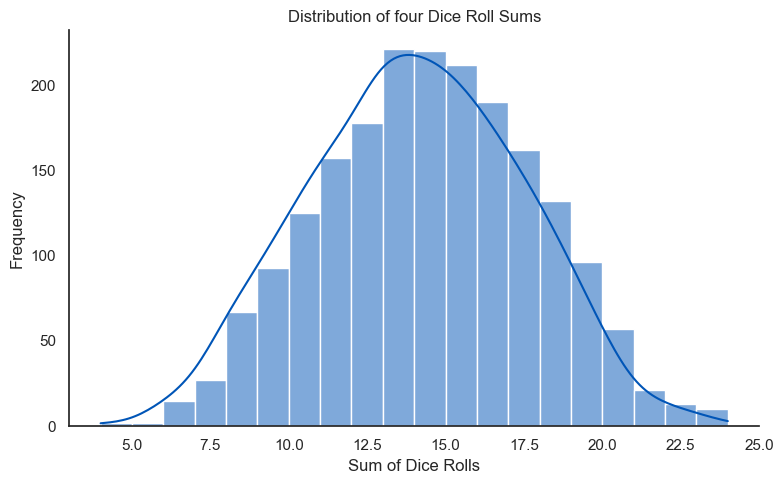

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn minimalist theme
sns.set_theme(style="white")  # or use "whitegrid" if you want subtle gridlines

plt.figure(figsize=(8, 5))

# Plot histogram with KDE
sns.histplot(df["sum_of_rolls"], bins=20, kde=True, color="#0055B7", edgecolor=None)

# Remove spines (top/right borders)
sns.despine()

plt.title("Distribution of four Dice Roll Sums")
plt.xlabel("Sum of Dice Rolls")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Visual Confirmation

The histogram of the dice sums clearly shows a bell-shaped curve, confirming that the sum of multiple uniform distributions tends toward a **normal distribution**, exactly as predicted by statistical theory.


In [26]:

from scipy.stats import normaltest, probplot

data = df["sum_of_rolls"]

# Perform D’Agostino and Pearson’s normality test
stat, p = normaltest(data)
print("p-value:", p)

if p > 0.05:
    print("Data looks normal (fail to reject H0)")
else:
    print("Data does NOT look normal (reject H0)")




p-value: 2.4141723029074297e-05
Data does NOT look normal (reject H0)


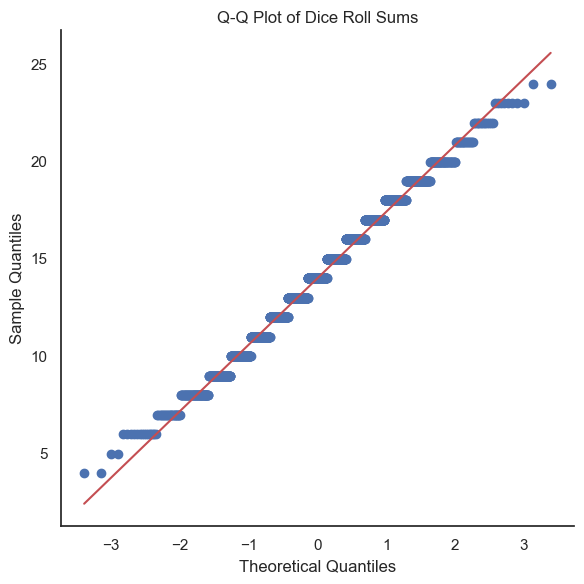

In [29]:
# Generate Q-Q plot to visually assess normality
plt.figure(figsize=(6, 6))
probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot of Dice Roll Sums")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
sns.despine()
plt.tight_layout()
plt.show()

## Q-Q Plot: Visualizing Normality

The Q-Q (Quantile-Quantile) plot above compares the **sample quantiles** of our simulated sums of four dice rolls against the **theoretical quantiles** of a standard normal distribution.

### Interpretation

- Each dot represents a quantile from our data plotted against the corresponding quantile from a perfect normal distribution.
- The **red line** represents a perfect match — if our data were perfectly normal, all points would lie exactly on this line.

###  What We Observe

- The points follow the line **very closely**, especially in the middle region.
- There are slight deviations at the **extremes (tails)** — this is expected due to:
  - The **discrete nature** of dice sums (integers only).
  - The **finite number of dice (4)** — which limits how closely the Central Limit Theorem (CLT) can approximate normality.
  - The **large sample size (2000)** — which makes even small deviations detectable.

### Conclusion

Despite the statistical test rejecting normality, the Q-Q plot shows that the data is **approximately normal** in practice. This validates our expectations based on the **Central Limit Theorem**, which predicts that the sum of multiple independent, identically distributed random variables tends toward a normal distribution.

For teaching, simulation, and most analytical purposes, this level of normality is considered sufficient.
